In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
import random
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# ***RNN***

In [5]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 33s 210ms/step - loss: 0.6606 - acc: 0.5954 - val_loss: 0.5187 - val_acc: 0.7624
Epoch 2/5
137/137 [==============================] - 27s 198ms/step - loss: 0.4541 - acc: 0.8009 - val_loss: 0.4426 - val_acc: 0.8060
Epoch 3/5
137/137 [==============================] - 27s 198ms/step - loss: 0.3431 - acc: 0.8597 - val_loss: 0.3650 - val_acc: 0.8441
Epoch 4/5
137/137 [==============================] - 29s 211ms/step - loss: 0.2887 - acc: 0.8859 - val_loss: 0.3660 - val_acc: 0.8504
Epoch 5/5
137/137 [==============================] - 29s 212ms/step - loss: 0.2627 - acc: 0.8955 - val_loss: 0.3680 - val_acc: 0.8469


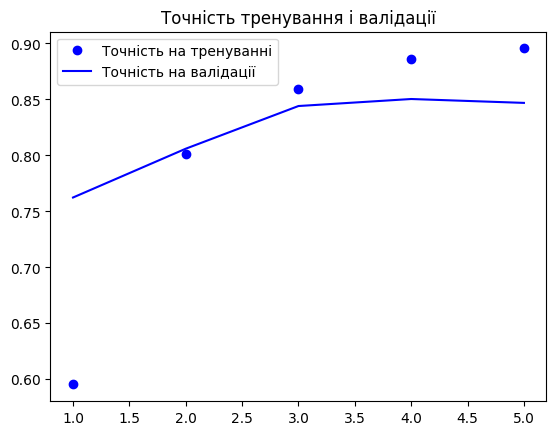

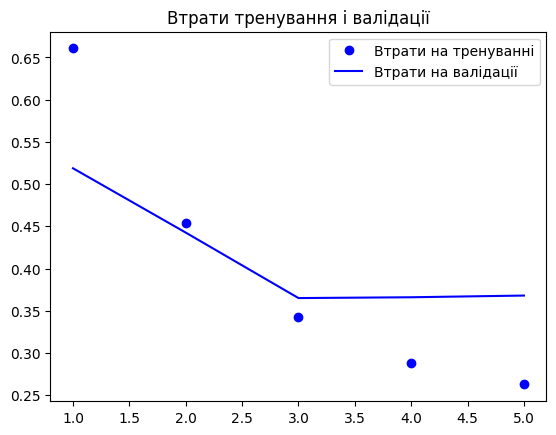

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

# ***LSTM***

In [10]:
from keras.layers import Embedding, LSTM, Dense

In [11]:
model2 = Sequential()

model2.add(Embedding(max_features, 32))

model2.add(LSTM(32))

model2.add(Dense(1, activation='sigmoid'))


In [12]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
history1 = model2.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 64s 446ms/step - loss: 0.6012 - acc: 0.6694 - val_loss: 0.4566 - val_acc: 0.8065
Epoch 2/5
137/137 [==============================] - 56s 412ms/step - loss: 0.3776 - acc: 0.8456 - val_loss: 0.3169 - val_acc: 0.8735
Epoch 3/5
137/137 [==============================] - 68s 500ms/step - loss: 0.2848 - acc: 0.8882 - val_loss: 0.3357 - val_acc: 0.8620
Epoch 4/5
137/137 [==============================] - 60s 439ms/step - loss: 0.2361 - acc: 0.9104 - val_loss: 0.2957 - val_acc: 0.8719
Epoch 5/5
137/137 [==============================] - 61s 448ms/step - loss: 0.2067 - acc: 0.9249 - val_loss: 0.3050 - val_acc: 0.8705


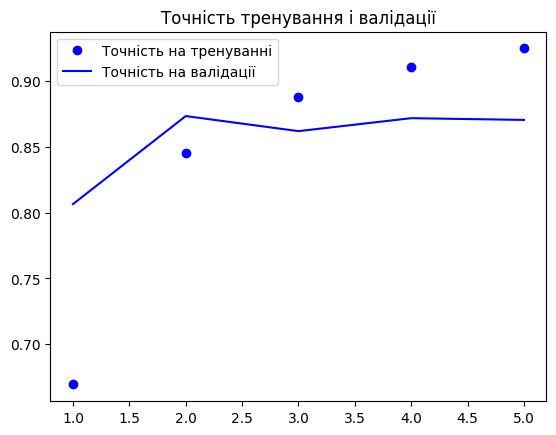

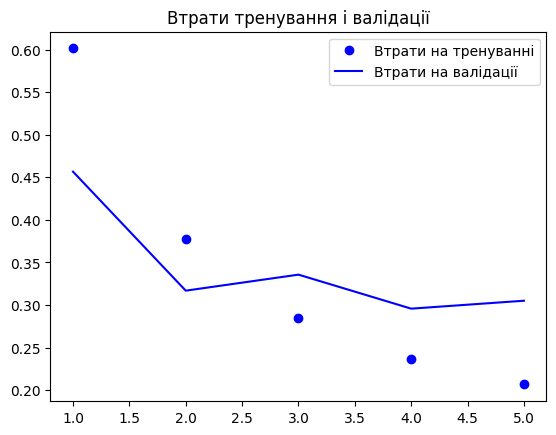

In [15]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

# ***BRNN***

In [16]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [17]:
model3 = Sequential()

model3.add(Embedding(max_features, 32))

model3.add(Bidirectional(LSTM(32)))

model3.add(Dense(1, activation='sigmoid'))


In [18]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [19]:
history3 = model3.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 119s 833ms/step - loss: 0.6448 - acc: 0.6116 - val_loss: 0.5270 - val_acc: 0.7343
Epoch 2/5
137/137 [==============================] - 104s 758ms/step - loss: 0.4121 - acc: 0.8298 - val_loss: 0.4182 - val_acc: 0.8127
Epoch 3/5
137/137 [==============================] - 104s 755ms/step - loss: 0.3003 - acc: 0.8826 - val_loss: 0.3575 - val_acc: 0.8457
Epoch 4/5
137/137 [==============================] - 105s 763ms/step - loss: 0.2419 - acc: 0.9094 - val_loss: 0.2916 - val_acc: 0.8799
Epoch 5/5
137/137 [==============================] - 118s 862ms/step - loss: 0.2124 - acc: 0.9222 - val_loss: 0.2927 - val_acc: 0.8867


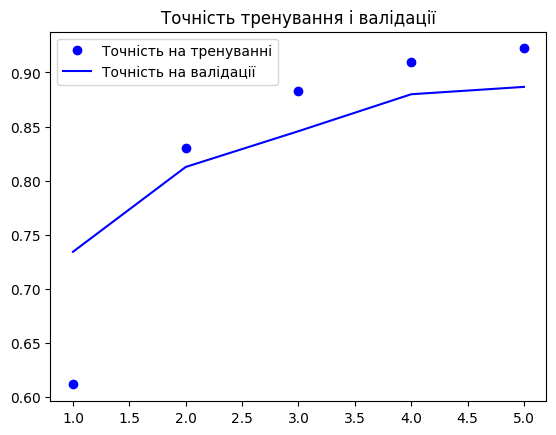

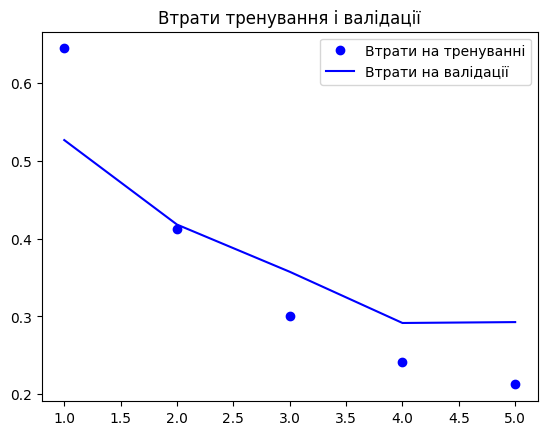

In [20]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

# ***DRNN***

In [28]:
model4 = Sequential()

model4.add(Embedding(max_features, 32))

model4.add(Bidirectional(LSTM(32, return_sequences=True)))
model4.add(Bidirectional(LSTM(32)))

model4.add(Dense(1, activation='sigmoid'))


In [29]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [30]:
history4 = model4.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 262s 2s/step - loss: 0.6653 - acc: 0.5725 - val_loss: 0.4948 - val_acc: 0.7728
Epoch 2/5
137/137 [==============================] - 250s 2s/step - loss: 0.4143 - acc: 0.8219 - val_loss: 0.3182 - val_acc: 0.8696
Epoch 3/5
137/137 [==============================] - 253s 2s/step - loss: 0.2887 - acc: 0.8881 - val_loss: 0.2918 - val_acc: 0.8811
Epoch 4/5
137/137 [==============================] - 244s 2s/step - loss: 0.2314 - acc: 0.9151 - val_loss: 0.2825 - val_acc: 0.8868
Epoch 5/5
137/137 [==============================] - 243s 2s/step - loss: 0.1926 - acc: 0.9300 - val_loss: 0.3007 - val_acc: 0.8852


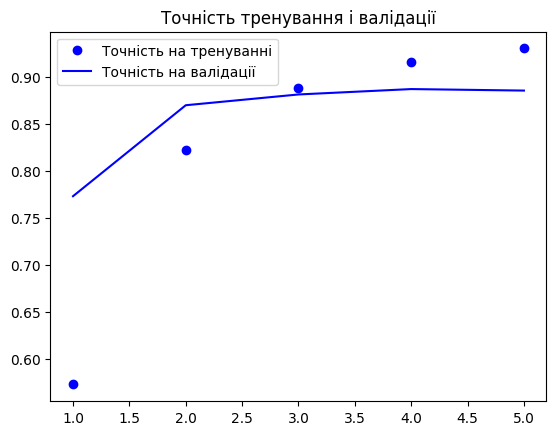

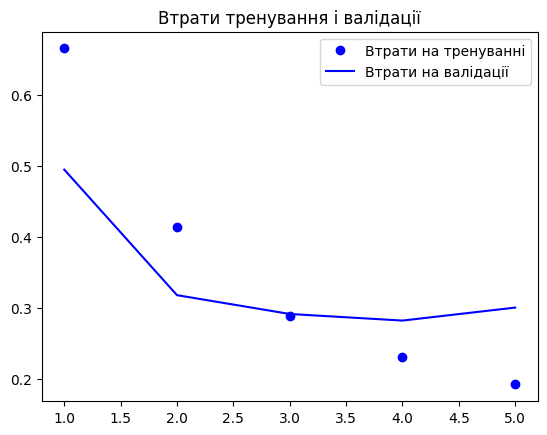

In [31]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [32]:
test_loss_RNN, test_acc_RNN = model.evaluate(input_test, y_test)
print('Test Loss RNN: {}'.format(test_loss_RNN))
print('Test Accuracy RNN: {}'.format(test_acc_RNN))
test_loss_LSTM, test_acc_LSTM = model2.evaluate(input_test, y_test)
print('Test Loss LSTM: {}'.format(test_loss_LSTM))
print('Test Accuracy LSTM: {}'.format(test_acc_LSTM))
test_loss_BRNN, test_acc_BRNN = model3.evaluate(input_test, y_test)
print('Test Loss BRNN: {}'.format(test_loss_BRNN))
print('Test Accuracy BRNN: {}'.format(test_acc_BRNN))
test_loss_DRNN, test_acc_DRNN = model4.evaluate(input_test, y_test)
print('Test Loss DRNN: {}'.format(test_loss_DRNN))
print('Test Accuracy DRNN: {}'.format(test_acc_DRNN))

782/782 [==============================] - 49s 62ms/step - loss: 0.3728 - acc: 0.8449
Test Loss RNN: 0.3728182315826416
Test Accuracy RNN: 0.8448799848556519
782/782 [==============================] - 47s 60ms/step - loss: 0.3174 - acc: 0.8652
Test Loss LSTM: 0.317379891872406
Test Accuracy LSTM: 0.8652399778366089
782/782 [==============================] - 71s 91ms/step - loss: 0.3059 - acc: 0.8812
Test Loss BRNN: 0.30594563484191895
Test Accuracy BRNN: 0.8812000155448914
782/782 [==============================] - 150s 192ms/step - loss: 0.3162 - acc: 0.8794
Test Loss DRNN: 0.3162077069282532
Test Accuracy DRNN: 0.8794000148773193
